

**E.A. Poe's corpus of short stories**







In [5]:
import pandas as pd

data = pd.read_csv("/content/preprocessed_data.csv")
data.columns


Index(['title', 'text', 'wikipedia_title', 'publication_date',
       'first_published_in', 'classification', 'notes', 'normalized_date'],
      dtype='object')

In [13]:
#import nltk
#nltk.download('stopwords')

import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("english")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

import re 

In [14]:
palabras = data.text.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

In [15]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

In [16]:
data['pp'] = data.text.apply(lambda texto: pre_procesado(texto))
data.head()

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date,pp
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841,ways god nature providence ways models frame w...
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838,chance good lady hath bereft thus comus quiet ...
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832,intensos rigidarn frontern ascendere canos pas...
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844,fall year residing near charlottesville virgin...
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835,dicebant mihi sodales si sepulchrum amicae vis...


In [17]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras)

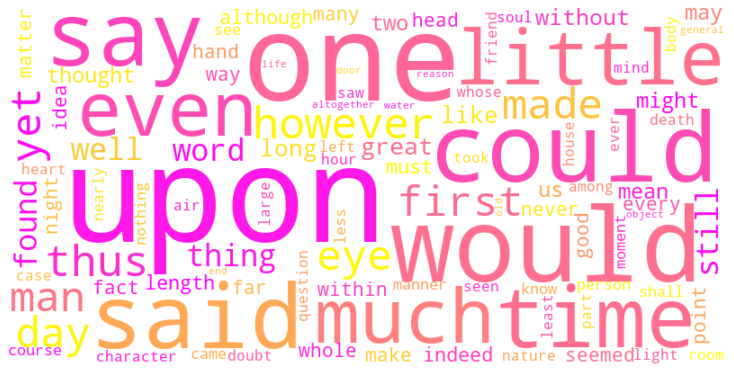

In [18]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()